In [100]:
import scanpy as sc # import scanpy to handle our AnnData 
import pandas as pd # import pandas to handle dataframes
import matplotlib.pyplot as plt # import matplotlib to visualize our qc metrics
import seaborn as sns # import seaborn to visualize our qc metrics

# magic incantation to help matplotlib work with our jupyter notebook
%matplotlib inline 

In [93]:
# read the summary from featureCounts 
summary = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/tabula_muris/smart_seq/featureCounts/Brain_NonMyeloid_astrocyte_counts.txt.summary', sep="\t", index_col=0)
summary = summary.T

# for each row (cell) get proportions of each feature across all types of reads 
summary_props = summary.div(summary.sum(axis=1), axis=0)

# clean up cell IDs in the first column, keep only the sample name everything before '_merged.mus.Aligned.out.sorted.CB.bam' 
summary_props.index = summary_props.index.str.split('_merged.mus.Aligned.out.sorted.CB.bam').str[0]

# rename the first column from Status to cell_id the first column is the index 
summary_props.index.name = 'cell_id'
summary_props.head()

Status,Assigned,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,Unassigned_MultiMapping,Unassigned_Secondary,Unassigned_NonSplit,Unassigned_NoFeatures,Unassigned_Overlapping_Length,Unassigned_Ambiguity
cell_id,,,,,,,,,,,,,,
A10-MAA000926-3_9_M-1-1,0.513324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096185,0.0,0.0,0.237560,0.0,0.152930
A11-B000404-3_56_F-1-1,0.562764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325019,0.0,0.0,0.061981,0.0,0.050236
A11-MAA000923-3_9_M-1-1,0.546682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297441,0.0,0.0,0.079207,0.0,0.076671
A11-MAA000944-3_9_M-1-1,0.328829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077843,0.0,0.0,0.386421,0.0,0.206907
A12-MAA000930-3_8_M-1-1,0.574127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091915,0.0,0.0,0.210299,0.0,0.123659


In [96]:
summary_props = summary_props.T

In [102]:
summary_props.shape

(14, 432)

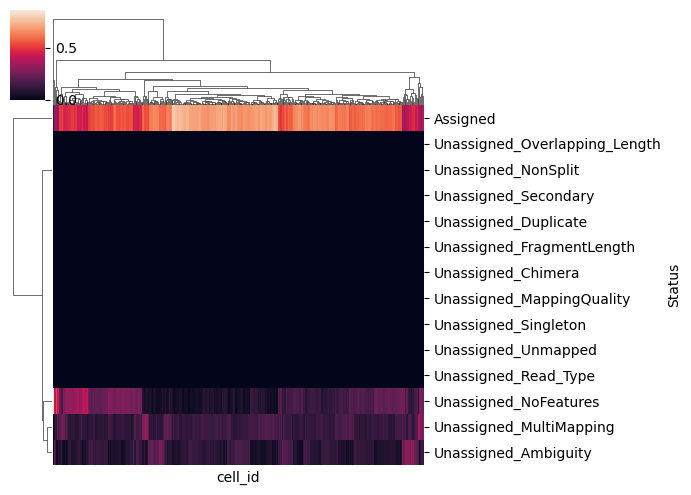

In [112]:
# plot summary_props as a heatmap with seaborn, don't plot cell_ids 
sns.clustermap(summary_props, xticklabels=False, figsize=(7, 5), dendrogram_ratio=(.1, .2))

In [114]:
## tell pandas to make a new DataFrame with the contents of `brain_counts.csv`. This might take a minute.
count_dataframe = pd.read_table('/gpfs/commons/groups/knowles_lab/data/tabula_muris/smart_seq/featureCounts/Brain_NonMyeloid_astrocyte_counts.txt', comment='#')

In [50]:
#First, we need to load in the metadata for our cells. This is a table that contains information about each cell in our dataset.
#metadata_dataframe = pd.read_csv('../data/brain_metadata.csv', # where to find the data
#                           index_col=0) # use the first column as the index

In [115]:
# keep only Geneid and the columns that contain cell names which start at column 6
count_dataframe = count_dataframe.iloc[:, [0] + list(range(6, count_dataframe.shape[1]))]

# make Geneid the index 
count_dataframe = count_dataframe.set_index('Geneid')

In [116]:
# clean up the column names, keep only everything before '_merged.mus.Aligned.out.sorted.CB.bam'
count_dataframe.columns = count_dataframe.columns.str.split('_merged.mus.Aligned.out.sorted.CB.bam').str[0]
count_dataframe.head()

,A10-MAA000926-3_9_M-1-1,A11-B000404-3_56_F-1-1,A11-MAA000923-3_9_M-1-1,A11-MAA000944-3_9_M-1-1,A12-MAA000930-3_8_M-1-1,A13-MAA000560-3_10_M-1-1,A13-MAA000923-3_9_M-1-1,A15-MAA000560-3_10_M-1-1,A15-MAA000944-3_9_M-1-1,A16-MAA000930-3_8_M-1-1,...,P5-MAA000926-3_9_M-1-1,P5-MAA000930-3_8_M-1-1,P5-MAA001894-3_39_F-1-1,P6-MAA000560-3_10_M-1-1,P6-MAA000942-3_8_M-1-1,P7-MAA000564-3_10_M-1-1,P7-MAA000947-3_9_M-1-1,P8-MAA000560-3_10_M-1-1,P9-MAA000930-3_8_M-1-1,P9-MAA001894-3_39_F-1-1
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102851.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# make a new AnnData object
# help(sc.AnnData)
#adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
adata = sc.AnnData(X = count_dataframe)
# switch var_names and obs in adata 
adata = adata.transpose()
print(adata)

AnnData object with n_obs × n_vars = 432 × 54446


/tmp/ipykernel_4552/1224504392.py:4: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X = count_dataframe)


In [119]:
adata.var_names

Index(['ENSMUSG00000102693.1', 'ENSMUSG00000064842.1', 'ENSMUSG00000051951.5',
       'ENSMUSG00000102851.1', 'ENSMUSG00000103377.1', 'ENSMUSG00000104017.1',
       'ENSMUSG00000103025.1', 'ENSMUSG00000089699.1', 'ENSMUSG00000103201.1',
       'ENSMUSG00000103147.1',
       ...
       'ENSMUSG00000064363.1', 'ENSMUSG00000064364.1', 'ENSMUSG00000064365.1',
       'ENSMUSG00000064366.1', 'ENSMUSG00000064367.1', 'ENSMUSG00000064368.1',
       'ENSMUSG00000064369.1', 'ENSMUSG00000064370.1', 'ENSMUSG00000064371.1',
       'ENSMUSG00000064372.1'],
      dtype='object', name='Geneid', length=54446)

In [120]:
#Because this is smartseq2 data, we may have spike-ins. These gene names start with ERCC. 
# We can label them in adata.var as a gene annotation.

is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  0


In [122]:
# get some QC metrics on adata 
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [123]:
adata

AnnData object with n_obs × n_vars = 432 × 54446
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [128]:
adata.obs["total_counts"].describe()

count    4.320000e+02
mean     1.505033e+06
std      2.344256e+06
min      9.393200e+04
25%      4.333435e+05
50%      8.788440e+05
75%      1.843208e+06
max      2.949306e+07
Name: total_counts, dtype: float64

(0.0, 1000000.0)

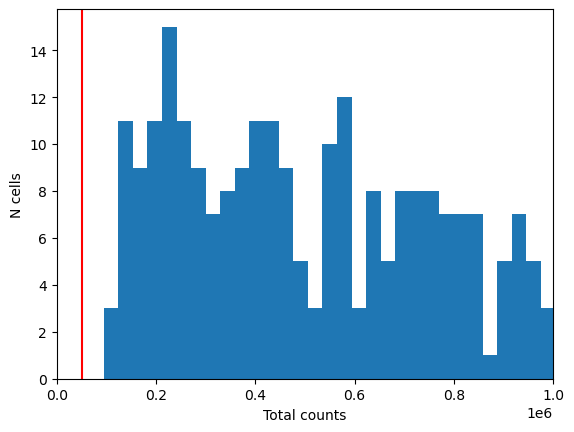

In [130]:
plt.hist(adata.obs['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')
plt.xlim(0,1e6)

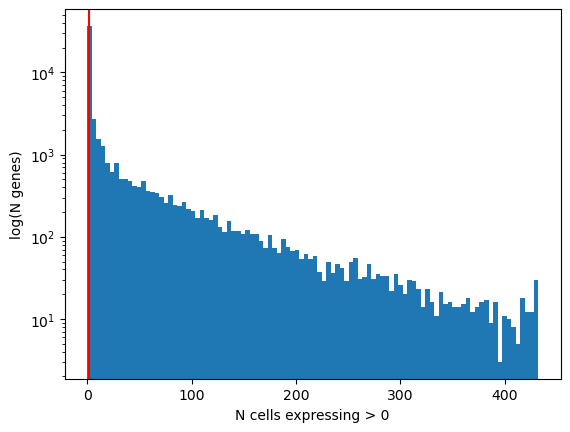

In [132]:
plt.hist(adata.var['n_cells_by_counts'], bins=100)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 